<a href="https://colab.research.google.com/github/alfinur063/SPK/blob/main/mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os

data = pd.read_csv("/content/drive/MyDrive/Dataset/Student Mental health.csv")

data.head(10)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [ ]:
data['Do you have Anxiety?']

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
96     Yes
97     Yes
98      No
99      No
100     No
Name: Do you have Anxiety?, Length: 101, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
dict = {'Choose your gender': 'Gender',
       'What is your course?': 'Course',
       'Your current year of Study' : 'Study Year',
       'What is your CGPA?' : 'CGPA',
       'Do you have Depression?' : 'Depression',
        'Do you have Anxiety?' : 'Anxiety',
        'Do you have Panic attack?' : 'Panic Attack',
        'Did you seek any specialist for a treatment?' : 'Treatment'
       }
    
data.rename(columns = dict, inplace = True)
data.head()

,Gender,Age,Course,Study Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
Timestamp,,,,,,,,,,
8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
categ = df.select_dtypes(include = 'object')
num = df.select_dtypes(exclude = 'object')

categ.head()


,Gender,Course,Study Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment
Timestamp,,,,,,,,,
8/7/2020 12:02,Female,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
8/7/2020 12:04,Male,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
8/7/2020 12:05,Male,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
8/7/2020 12:06,Female,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
8/7/2020 12:13,Male,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
num.head()

,Age
Timestamp,
8/7/2020 12:02,18.0
8/7/2020 12:04,21.0
8/7/2020 12:05,19.0
8/7/2020 12:06,22.0
8/7/2020 12:13,23.0


In [ ]:
data.shape

(101, 11)

In [ ]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [ ]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
df.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df['Age']=df['Age'].fillna(int(df['Age'].mean()))
df.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
arr = df["What is your course?"].unique()
arr

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

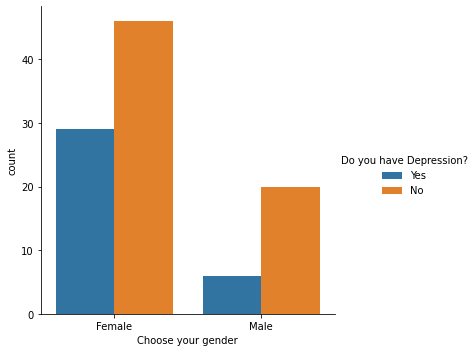

In [ ]:
sns.catplot(x='Choose your gender',hue='Do you have Depression?',kind='count',data=df)

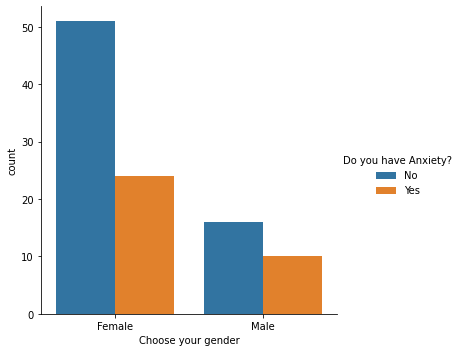

In [ ]:
sns.catplot(x='Choose your gender',hue='Do you have Anxiety?',kind='count',data=df)

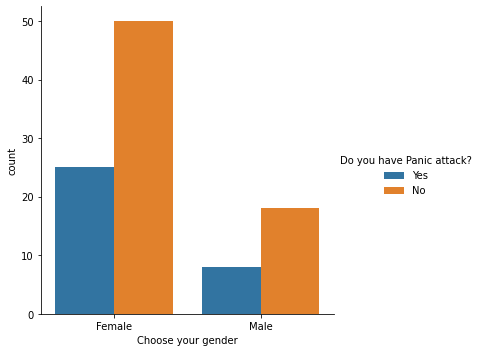

In [ ]:
sns.catplot(x='Choose your gender',hue='Do you have Panic attack?',kind='count',data=df)

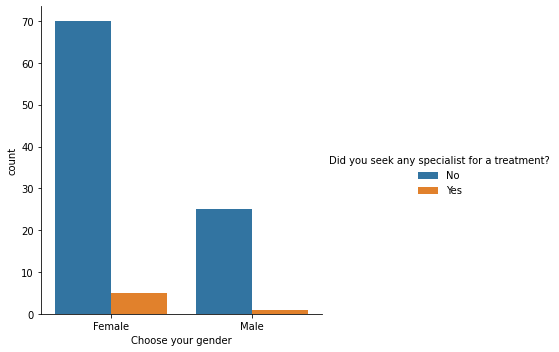

In [ ]:
sns.catplot(x='Choose your gender',hue='Did you seek any specialist for a treatment?',kind='count',data=df)

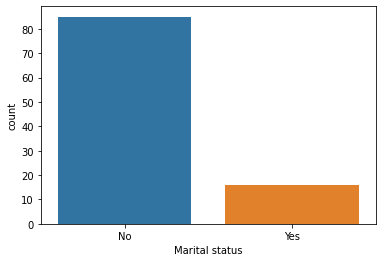

In [ ]:
sns.countplot(x="Marital status",data=df)

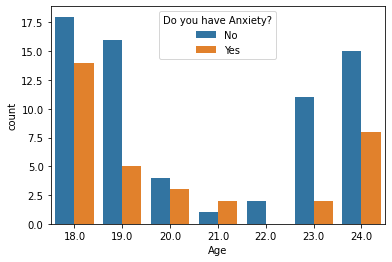

In [ ]:
sns.countplot(x="Age", hue='Do you have Anxiety?',data=df)

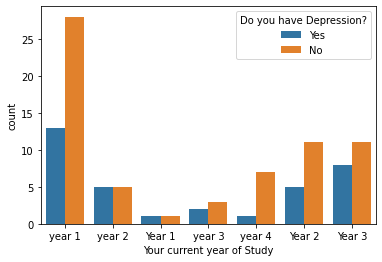

In [ ]:
sns.countplot(x="Your current year of Study", hue='Do you have Depression?',data=df)

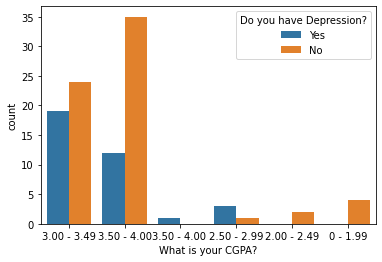

In [ ]:
sns.countplot(x="What is your CGPA?", hue='Do you have Depression?',data=df)


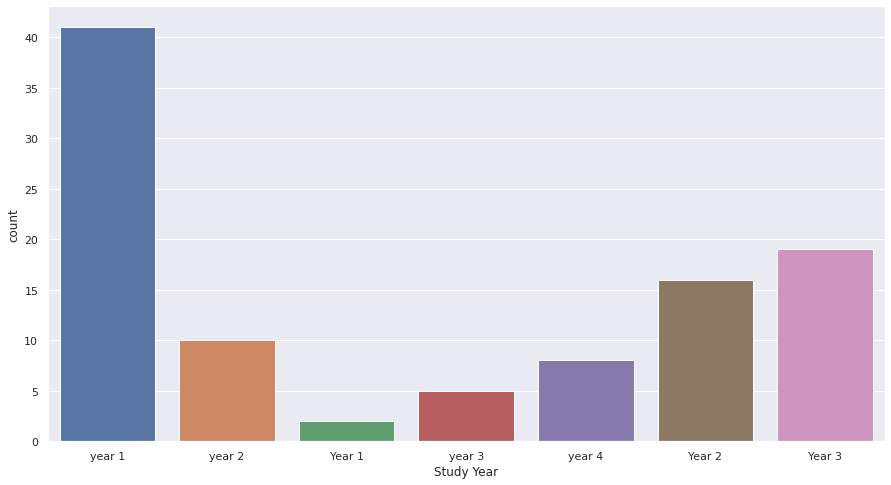

In [ ]:
sns.countplot(x = 'Study Year', data = df)
plt.show()

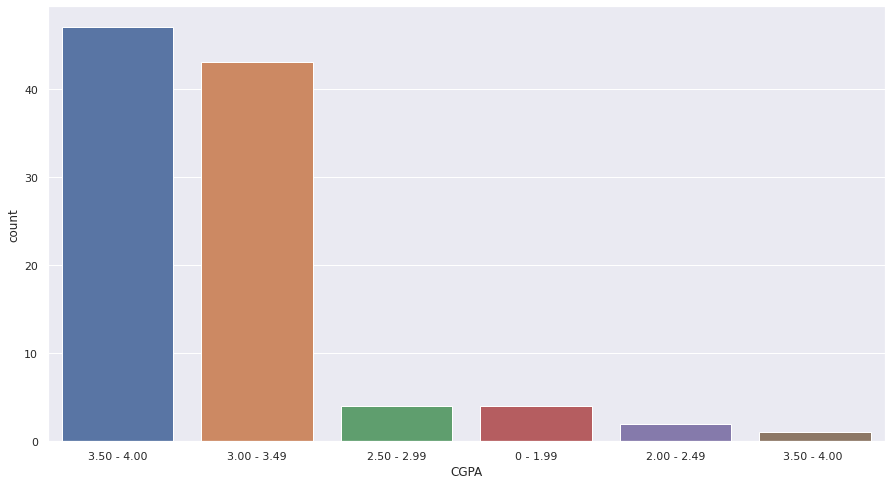

In [ ]:
sns.countplot(x= df['CGPA'], order = df['CGPA'].value_counts(normalize=True).index)
plt.show()

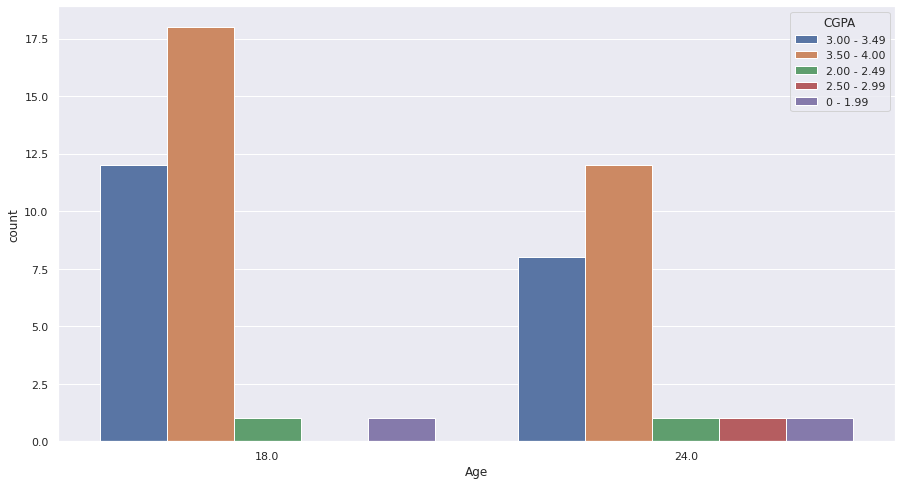

In [ ]:
df_new = df[(df['Age'] == 18) | (df['Age'] == 24)]
df_new.shape
sns.countplot(x= df_new['Age'], hue = df_new['CGPA'])
plt.show()

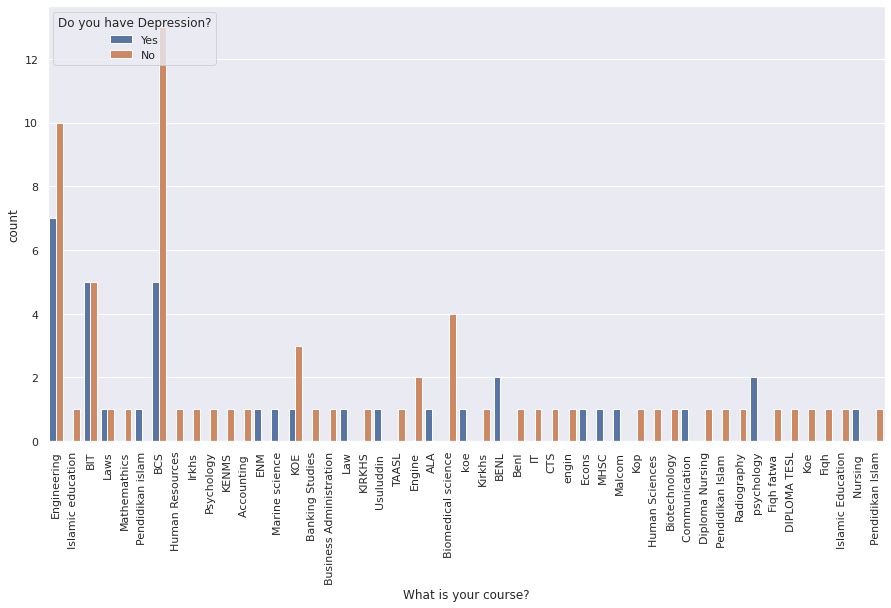

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
yr=sns.countplot(x='What is your course?',hue='Do you have Depression?',data=df)
yr.set_xticklabels(yr.get_xticklabels(),rotation=90);

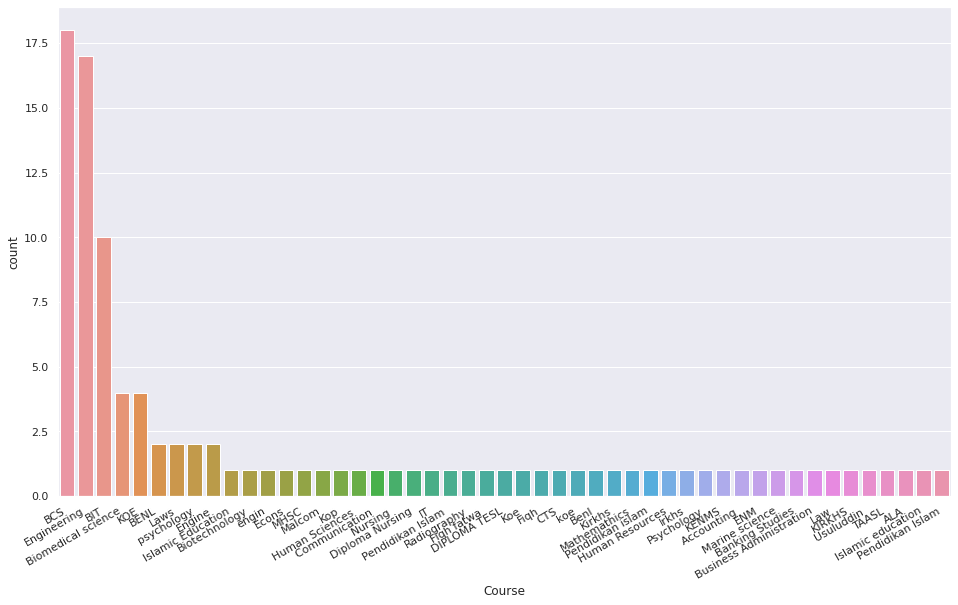

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = df['Course'], order = df['Course'].value_counts(normalize = True).index)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()